# Importing all the necessary packages

In [39]:
#importing packages
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np

# Scrap data(news) for train dataset from the Hindu Website using BeautifulSoup

In [21]:
url="https://www.thehindu.com/latest-news/"

In [22]:
#Sending the request to the url
response = requests.get(url)

In [23]:
response

<Response [200]>

In [24]:
#initializing parser
soup = BeautifulSoup(response.text, "html.parser")

In [29]:
coverpage_news=[]
# We'll save in coverpage the cover page content
response.status_code
mainpage = response.content

# Soup creation
soup1 = BeautifulSoup(mainpage, 'html5lib')
# News identification
for ultag in soup1.find_all('ul', {'class': 'latest-news'}):
        for litag in ultag.find_all('li'):
                #print (litag.text)
                coverpage_news.append(litag)

In [30]:
len(coverpage_news)

200

In [31]:
coverpage_news[0]

<li>
<a href="https://www.thehindu.com/children/alien-obsession/article32708851.ece">Alien obsession </a> | <span class="homeSection-name">Children</span>, <span class="l-datetime">20:35</span>
</li>

In [34]:
coverpage_news[0].get_text()

'\nAlien obsession  | Children, 20:35\n'

In [35]:
link = coverpage_news[0].find('a')['href']
link

'https://www.thehindu.com/children/alien-obsession/article32708851.ece'

In [36]:
article = requests.get(link)
article_content = article.content
soup_article = BeautifulSoup(article_content, 'html5lib')
body = soup_article.find_all('div', class_='paywall')

In [37]:
body

[<div class="paywall" id="content-body-14269002-32708851">
 <p><strong>The story so far: </strong><em>After Maya opens a Facebook account, she sends Nana a friend request. On seeing many of his friends on Facebook, Rocky feels left out. </em></p><p>Although Rocky was relieved that Nana hadn’t responded, he was intrigued about ghosts using Facebook.</p><p>“Papa, can ghosts use Facebook?” Rocky shocked his father at dinner. </p><p>“Why suddenly?” asked Mr. Ghosh. </p><p>“Just like that.” </p><p>“This definitely isn’t your idea.”</p><p>“Why not?” asked Rocky. “Remember the aliens? That, too was my idea.”</p><p>“Ah, aliens. How can I ever forget that episode, Rocky!” his father scowled. “In fact, every resident of our housing complex too will remember that night. Who else could have imagined that a power cut could actually be an alien invasion to take over our planet?”</p><p><strong>Destiny</strong></p><p>But Rocky alone wasn’t entirely to blame for his alien obsession. He was born into a 

In [41]:
import re
news_contents = []
list_links = []
list_titles = []
total_no_of_articles=200
for n in np.arange(0, total_no_of_articles):
        
    # Getting the link of the article
    link = coverpage_news[n].find('a')['href']
    list_links.append(link)
    
    # Getting the title
    title = coverpage_news[n].find('a').get_text()
    list_titles.append(title)
    
    # Reading the content (it is divided in paragraphs)
    article = requests.get(link)
    article_content = article.content
    soup_article = BeautifulSoup(article_content, 'html5lib')
    body = soup_article.find_all('div', class_='paywall')
    
    # Unifying the paragraphs
    list_paragraphs = []
    for p in np.arange(0, len(body)):
        paragraph = body[p].get_text()
        list_paragraphs.append(paragraph)
        final_article = " ".join(list_paragraphs)
        news_contents.append(final_article)

In [80]:
news_contents

['\nThe story so far: After Maya opens a Facebook account, she sends Nana a friend request. On seeing many of his friends on Facebook, Rocky feels left out. Although Rocky was relieved that Nana hadn’t responded, he was intrigued about ghosts using Facebook.“Papa, can ghosts use Facebook?” Rocky shocked his father at dinner. “Why suddenly?” asked Mr. Ghosh. “Just like that.” “This definitely isn’t your idea.”“Why not?” asked Rocky. “Remember the aliens? That, too was my idea.”“Ah, aliens. How can I ever forget that episode, Rocky!” his father scowled. “In fact, every resident of our housing complex too will remember that night. Who else could have imagined that a power cut could actually be an alien invasion to take over our planet?”DestinyBut Rocky alone wasn’t entirely to blame for his alien obsession. He was born into a housing complex named Space Housing Complex, with a miniature UFO stationed on top of its community hall, visible from Rocky’s bedroom.His first ride in the children

In [85]:
import pandas as pd
# df_features
df_features = pd.DataFrame(
     {'Article Content': news_contents
      
    })

# df_show_info
df_show_info = pd.DataFrame(
    {'Article Title': list_titles,
     'Article Link': list_links})

In [86]:
df_features = df_features.replace('\n','', regex=True)
df_features.head()
##df_features.shape
#df_features.head()

,Article Content
0,The story so far: After Maya opens a Facebook ...
1,Several organisations have announced that they...
2,The highest number of fresh COVID-19 cases in ...
3,There were 82 patients who tested positive for...
4,Jaswant Singh was guided by a view of “India’s...


In [45]:
df_show_info

,Article Title,Article Link
0,Alien obsession,https://www.thehindu.com/children/alien-obsess...
1,Several organisations announce participation i...,https://www.thehindu.com/news/national/karnata...
2,Kozhikode reports highest number of COVID-19 c...,https://www.thehindu.com/news/cities/kozhikode...
3,82 patients test positive in Madurai,https://www.thehindu.com/news/cities/Madurai/8...
4,Diplomacy was Jaswant Singh’s ‘Call to Honour’,https://www.thehindu.com/news/national/diploma...
...,...,...
195,Rajasthan’s new policy to focus on rural tourism,https://www.thehindu.com/news/cities/kolkata/r...
196,To all the ‘Thangavelus’ out there,https://www.thehindu.com/opinion/open-page/to-...
197,Situation tense in Dungarpur,https://www.thehindu.com/news/cities/kolkata/s...
198,"State reports 5,647 new infections, 85 fatalit...",https://www.thehindu.com/news/national/tamil-n...


In [87]:
print("sum of duplicated values{}\n".format(df_features.duplicated().sum()))

sum of duplicated values0



In [89]:
# Saving article content into csv
df_features.to_csv(r'C:\\Users\\ankit\\Desktop\\fliprobo work\\shankar sir files\\projects\\scrapped_news.csv',index=None,header=True)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# Data acquisition

In [90]:
# Reading the csv files
news = pd.read_csv(r'C:\\Users\\ankit\\Desktop\\fliprobo work\\shankar sir files\\projects\\scrapped_news.csv')
news

,Article Content
0,The story so far: After Maya opens a Facebook ...
1,Several organisations have announced that they...
2,The highest number of fresh COVID-19 cases in ...
3,There were 82 patients who tested positive for...
4,Jaswant Singh was guided by a view of “India’s...
...,...
191,"Tourism and rural development, which is the th..."
192,It was Ladakh’s peak winter month of February ...
193,The situation in Rajastan’s Dungapur district ...
194,"Tamil Nadu added 5,647 fresh cases of COVID-19..."


# DATA PREPROCESSING

In [91]:
# Add number of characters column
news["char"] = news["Article Content"].apply(lambda x: len(x))
news.head()

,Article Content,char
0,The story so far: After Maya opens a Facebook ...,2486
1,Several organisations have announced that they...,2557
2,The highest number of fresh COVID-19 cases in ...,1178
3,There were 82 patients who tested positive for...,1398
4,Jaswant Singh was guided by a view of “India’s...,5111


# To clean textual data, will make a function 'clean_text' function that performs several transformations:
lower the text:
tokenize the text (split the text into words) and remove the punctuation
remove useless words that contain numbers
remove useless stop words like 'the', 'a' ,'this','is' etc.
Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
lemmatize and stemming the text: transform every word into their root form.

In [92]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer("english")

def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # Remove (/n) from text
    text=re.sub("\n", "", text)

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize and stemming text
    text = [stemmer.stem(WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1]))) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
news["Article_Content_clean"] = news["Article Content"].apply(lambda x: clean_text(x))

In [93]:
#Add number of characters column after cleaning the text
news["clean_chars_length"] = news["Article_Content_clean"].apply(lambda x: len(x))

# Add number of words column after cleaning the text
news["clean_words"] = news["Article_Content_clean"].apply(lambda x: len(x.split(" ")))

news.head(5)

,Article Content,char,Article_Content_clean,clean_chars_length,clean_words
0,The story so far: After Maya opens a Facebook ...,2486,stori far maya open facebook account send nana...,1445,238
1,Several organisations have announced that they...,2557,sever organis announc join monday state bandh ...,1591,238
2,The highest number of fresh COVID-19 cases in ...,1178,high number fresh covid case state sunday repo...,657,102
3,There were 82 patients who tested positive for...,1398,patient test posit covid madurai district sund...,817,129
4,Jaswant Singh was guided by a view of “India’s...,5111,jaswant singh guid view india destini extern a...,3075,458


In [94]:
# Total length removal
print ('Origian Length',news.char.sum())
print ('Clean Length',news.clean_chars_length.sum())

Origian Length 401442
Clean Length 238824


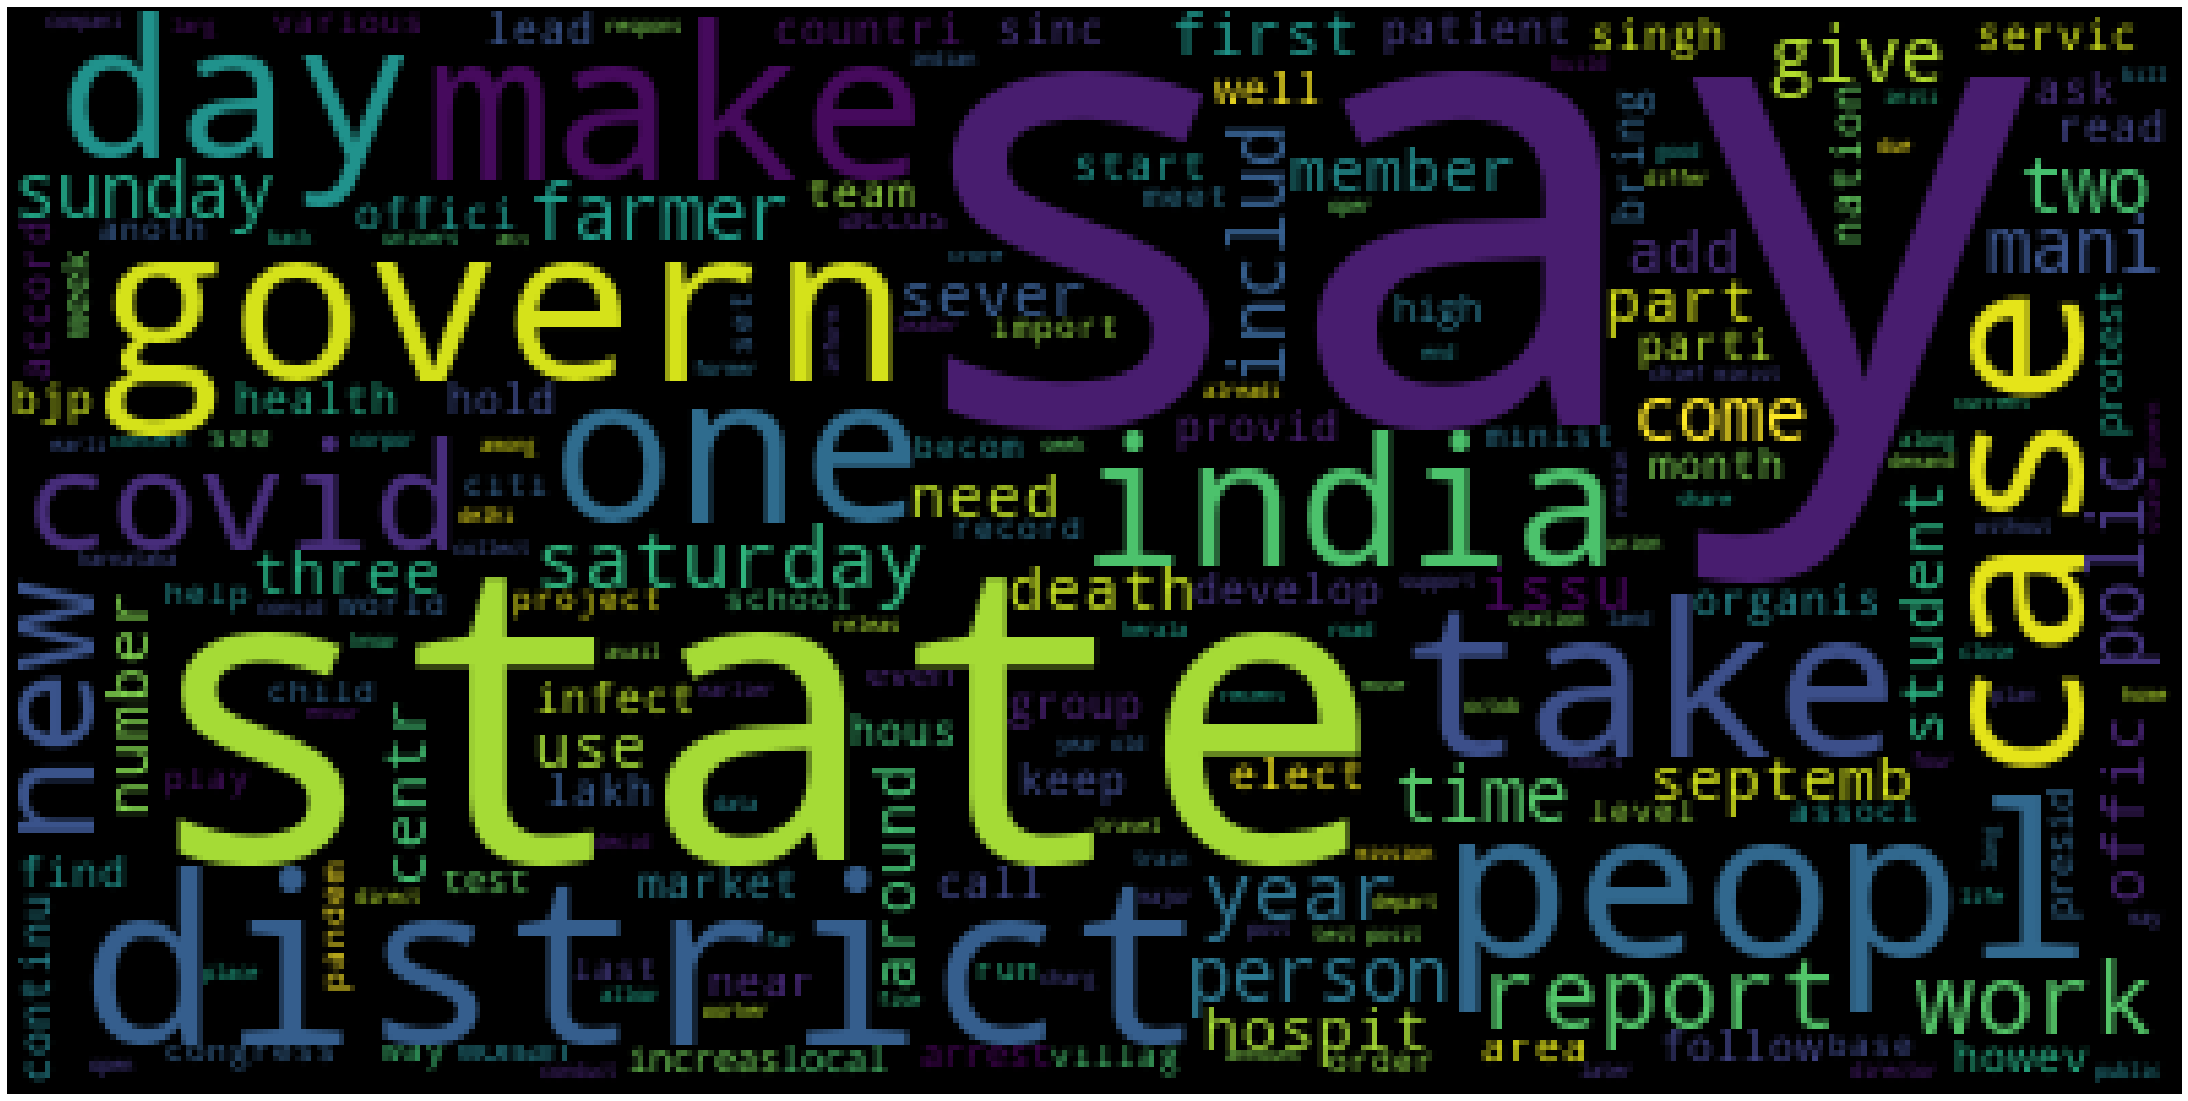

In [98]:
from wordcloud import WordCloud
wordcloud =  WordCloud(background_color="black").generate(' '.join(news["Article_Content_clean"]))
# Generate plot
plt.figure( figsize=(50,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [100]:
#Converting  dataframe to list
topics_docs = news['Article_Content_clean'].values.tolist()
topics_docs[1]

'sever organis announc join monday state bandh belagavi vijayapura district effect lockdown karnataka rakshana vedik district unit presid deepak gudanatti tell journalist belagavi sunday announc sever organis support bandh monday kannada organis dalit organis farmer organis youth organis support bandh add karnataka rajya raitha sangha leader jayashre gurannanavar say three nation bill land reform amend bill state potenti destroy million farmer reduc land own farmer landless worker bond labour indebt worker whose child grandchild would work decad repay loan say choonappa pujari other present karnataka rajya raitha sangha member vijayapura say would particip bandh protest farm bill belagavi superintend polic lakshman nimbaragi give stern warn protest urg damag public properti name bandh video messag releas sunday say law order disturb would allow monday farmer other particip bandh block road caus damag properti serious deal per law say observ social distanc covid safeti protocol violat a

In [102]:
pip install -U gensim

  Created wheel for smart-open: filename=smart_open-2.2.0-cp36-none-any.whl size=116518 sha256=02b7aead6eb9ea6e729a04ef28d8337d36be14fef835e29445296156ed106c52
  Stored in directory: C:\Users\ankit\AppData\Local\pip\Cache\wheels\03\04\55\a6c593190f6852d2affb744e398a8fde5b5a63cd0c7e005b83
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


In [104]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(topics_docs))

print(data_words[:2])
# With the help of Gensim’s simple_preprocess() we tokenise each sentence into a list of words it is kinda alternative of word tokenize

[['stori', 'far', 'maya', 'open', 'facebook', 'account', 'send', 'nana', 'friend', 'request', 'see', 'mani', 'friend', 'facebook', 'rocki', 'feel', 'leav', 'although', 'rocki', 'reliev', 'nana', 'respond', 'intrigu', 'ghost', 'use', 'facebook', 'papa', 'ghost', 'use', 'facebook', 'rocki', 'shock', 'father', 'dinner', 'sudden', 'ask', 'ghosh', 'like', 'definit', 'idea', 'ask', 'rocki', 'rememb', 'alien', 'idea', 'alien', 'ever', 'forget', 'episod', 'rocki', 'father', 'scowl', 'fact', 'everi', 'resid', 'hous', 'complex', 'rememb', 'night', 'els', 'could', 'imagin', 'power', 'cut', 'could', 'actual', 'alien', 'invas', 'take', 'planet', 'destinybut', 'rocki', 'alon', 'entir', 'blame', 'alien', 'obsess', 'born', 'hous', 'complex', 'name', 'space', 'hous', 'complex', 'miniatur', 'ufo', 'station', 'top', 'communiti', 'hall', 'visibl', 'rocki', 'bedroom', 'first', 'ride', 'child', 'park', 'small', 'spaceship', 'choos', 'play', 'jadoo', 'communiti', 'function', 'rocki', 'believ', 'destin', 'som

# Create the Dictionary and Corpus needed for Topic Modeling

In [105]:
# Building Dictionary 
dictionary = gensim.corpora.Dictionary(data_words)
print(dictionary)

Dictionary(6181 unique tokens: ['abl', 'account', 'actual', 'alien', 'alon']...)


In [106]:
#remove rare and repeatative words
dictionary.filter_extremes(no_below=2, no_above=0.3, keep_n=100000)

In [107]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]
bow_corpus[0]

[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 3),
 (22, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 2),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 7),
 (42, 1),
 (43, 1),
 (44, 4),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 4),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 6),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 5),
 (61, 2),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 2),
 (69, 1),
 (70, 3),
 (71, 1),
 (72, 7),
 (73, 1),
 (74, 2),
 (75, 2),
 (76, 1),
 (77, 1),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 2),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 2),
 (91, 2),
 (92, 1),
 (93, 2),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [108]:
document_num = 10
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 7 ("ask") appears 1 time.
Word 19 ("come") appears 1 time.
Word 23 ("continu") appears 2 time.
Word 34 ("entir") appears 2 time.
Word 43 ("far") appears 1 time.
Word 48 ("first") appears 2 time.
Word 77 ("new") appears 2 time.
Word 115 ("use") appears 1 time.
Word 124 ("add") appears 1 time.
Word 185 ("north") appears 2 time.
Word 201 ("price") appears 1 time.
Word 218 ("social") appears 1 time.
Word 221 ("studi") appears 1 time.
Word 235 ("work") appears 1 time.
Word 248 ("colleg") appears 1 time.
Word 254 ("expert") appears 1 time.
Word 262 ("health") appears 3 time.
Word 265 ("hospit") appears 2 time.
Word 267 ("infect") appears 1 time.
Word 272 ("medic") appears 3 time.
Word 286 ("test") appears 1 time.
Word 300 ("patient") appears 1 time.
Word 315 ("virus") appears 1 time.
Word 340 ("central") appears 1 time.
Word 344 ("council") appears 1 time.
Word 346 ("countri") appears 1 time.
Word 357 ("direct") appears 1 time.
Word 389 ("india") appears 2 time.
Word 390 ("indian") appe

In [109]:
#Building LDA Topic Model

lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   random_state=100,
                                   workers = 2,
                                   chunksize=100,
                                   per_word_topics=True)

In [110]:
#Article - Topic Distribution for first Article
def get_article_topic_distribution(article):
    return lda_model.get_document_topics(article)
#Returns a list containing a list of tuple
#Each inner list corresponds to an article and each tuple refers to topicID and its corresponding probability  
map(get_article_topic_distribution, bow_corpus)

In [111]:
#The LDA model(lda_model) we have created above can be used to view the topics from the documents. It can be done with the help of following script 
lda_model.print_topics()

[(0,
  '0.012*"tea" + 0.012*"land" + 0.011*"tribal" + 0.010*"india" + 0.009*"mission" + 0.008*"cricket" + 0.007*"council" + 0.007*"ladakh" + 0.006*"factori" + 0.006*"smart"'),
 (1,
  '0.008*"work" + 0.008*"rainfal" + 0.008*"meet" + 0.007*"mask" + 0.007*"howev" + 0.007*"ask" + 0.006*"leav" + 0.006*"hand" + 0.006*"india" + 0.006*"first"'),
 (2,
  '0.021*"bill" + 0.018*"bjp" + 0.017*"parti" + 0.014*"farmer" + 0.013*"farm" + 0.012*"congress" + 0.011*"leader" + 0.011*"minist" + 0.009*"presid" + 0.007*"work"'),
 (3,
  '0.009*"posit" + 0.008*"test" + 0.008*"minist" + 0.008*"code" + 0.008*"farmer" + 0.008*"act" + 0.007*"karnataka" + 0.007*"polic" + 0.007*"rate" + 0.007*"industri"'),
 (4,
  '0.029*"blood" + 0.024*"donat" + 0.013*"job" + 0.011*"countri" + 0.010*"test" + 0.010*"get" + 0.007*"india" + 0.007*"candid" + 0.006*"donor" + 0.006*"time"'),
 (5,
  '0.012*"tourism" + 0.009*"farmer" + 0.008*"polic" + 0.007*"protest" + 0.006*"agricultur" + 0.006*"local" + 0.005*"villag" + 0.005*"develop" + 0

# Compute Model Perplexity and Coherence Score

In [112]:
from gensim.models import CoherenceModel
from gensim import models

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.600859676087723

Coherence Score:  0.36730821537620384


=> The LDA model (lda_model) we have created above can be used to compute the model’s perplexity, i.e. how good the model is. The lower the score the better the model will be.


=> Coherence score is the average /median of the pairwise word-similarity scores of the words in the topic.If it is greater model works well.

# LDA MODEL

In [114]:
#Running lda model with best parameters
# Let’s train the final model using the above selected parameters
lda_model_tune = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9099)

In [115]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tune.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = models.CoherenceModel(model=lda_model_tune, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.414785376454797

Coherence Score:  0.37452361322805056


In [118]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tune, bow_corpus, dictionary)
vis

C:\Users\ankit\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.113588  0.013876       1        1  17.665760
2     -0.041577  0.063890       2        1  15.730479
5     -0.007408  0.021157       3        1  14.863766
3     -0.002068  0.022556       4        1  11.259604
1     -0.002431 -0.023636       5        1   9.802962
9     -0.015176 -0.019897       6        1   7.833220
4     -0.009502 -0.022295       7        1   7.329653
0     -0.016103 -0.031729       8        1   6.376787
8     -0.007550 -0.018985       9        1   4.876667
7     -0.011773 -0.004936      10        1   4.261101, topic_info=     Category        Freq     Term       Total  loglift  logprob
247   Default  141.000000     case  141.000000  30.0000  30.0000
196   Default   89.000000    polic   89.000000  29.0000  29.0000
1617  Default   27.000000    blood   27.000000  28.0000  28.0000
300   Default   52.000000  patient   52.000000  27.0000  27.0000
286   Default   78.000000     test   78.000000  26.0000  26.0000
...       ...         ...      ...         ...      ...      ...
539   Topic10    2.608516  develop   37.458447   0.4912  -6.1594
953   Topic10    2.418274     near   28.768646   0.6794  -6.2351
158   Topic10    2.378483     give   43.974064   0.2385  -6.2517
338   Topic10    2.268089     call   31.262930   0.5321  -6.2993
235   Topic10    2.280235     work   56.850487  -0.0605  -6.2939

[553 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1245      1  0.095324         abil
1245      2  0.095324         abil
1245      3  0.190649         abil
1245      4  0.381297         abil
2106      1  0.152968         abus
...     ...       ...          ...
1561      9  0.174690          xii
2617      1  0.094367  yediyurappa
2617      2  0.566204  yediyurappa
2617      3  0.094367  yediyurappa
2617      4  0.094367  yediyurappa

[3051 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 6, 4, 2, 10, 5, 1, 9, 8])

# TESTING ON TEST DATA

In [155]:
# url definition
testurl = "https://www.thehindu.com/latest-news/"
# Request
r1 = requests.get(testurl)
r1.status_code
newcoverpage_news=[]
# We'll save in coverpage the cover page content
newcoverpage = r1.content

# Soup creation
souptest = BeautifulSoup(newcoverpage, 'html5lib')
# News identification
for ultag in souptest.find_all('ul', {'class': 'latest-news'}):
        for litag in ultag.find_all('li'):
                #print (litag.text)
                newcoverpage_news.append(litag)

In [156]:
len(newcoverpage_news)

53

In [157]:
newcoverpage_news[4]

<li>
<a href="https://www.thehindu.com/news/national/tamil-nadu/ambur-si-succumbs-to-infection/article32710400.ece">Ambur SI succumbs to infection </a> | <span class="homeSection-name">Tamil Nadu</span>, <span class="l-datetime">00:47</span>
</li>

In [158]:
newcoverpage_news[4].get_text()

'\nAmbur SI succumbs to infection  | Tamil Nadu, 00:47\n'

In [159]:
newlink = newcoverpage_news[4].find('a')['href']
newlink

'https://www.thehindu.com/news/national/tamil-nadu/ambur-si-succumbs-to-infection/article32710400.ece'

In [160]:
newarticle = requests.get(newlink)
newarticle_content = newarticle.content
newsoup_article = BeautifulSoup(newarticle_content, 'html5lib')
newbody = newsoup_article.find_all('div', class_='paywall')

In [161]:
newbody

[<div class="paywall" id="content-body-14269002-32710400">
 <p>A sub-inspector attached to the crime wing, Ambur police station, succumbed to COVID-19 on Sunday. The district police have assured support to his family.</p><p>K.K. Shanmugam, 52, belonged to the 1993 batch and is survived by his wife, two sons and a daughter. “On September 24, he was found to have typhoid, and on September 25, he tested positive for COVID-19,” said P. Vijayakumar, SP, Tirupathur. Following this, he was admitted to the Vaniyambadi government hospital for treatment. “He was good at his work. He was recently rewarded for securing a man who was absconding for 20 years, with an NBW. He was attached to the Anaicut station. Since he lived in the Ambur police quarters, he was attached to the Ambur station recently,” said Mr. Vijayakumar. </p><p>The SP met Mr. Shanmugam’s family and assured them support. “We will arrange whatever the children need for their education,” he said.</p>
 </div>]

In [163]:
import re
newscontents = []
newlist_links = []
newlist_titles = []
total_no_of_articles=53
for n in np.arange(0, total_no_of_articles):
        
    # Getting the link of the article
    newlink = newcoverpage_news[n].find('a')['href']
    newlist_links.append(newlink)
    
    # Getting the title
    newtitle = newcoverpage_news[n].find('a').get_text()
    newlist_titles.append(newtitle)
    
    # Reading the content (it is divided in paragraphs)
    newarticle = requests.get(newlink)
    newarticle_content = newarticle.content
    newsoup_article = BeautifulSoup(newarticle_content, 'html5lib')
    newbody = newsoup_article.find_all('div', class_='paywall')
    
    # Unifying the paragraphs
    newlist_paragraphs = []
    for p in np.arange(0, len(newbody)):
        newparagraph = newbody[p].get_text()
        newlist_paragraphs.append(newparagraph)
        newfinal_article = " ".join(newlist_paragraphs)
        newscontents.append(newfinal_article)

In [164]:
# features
features = pd.DataFrame(
     {'Article Content': newscontents 
    })

# df_show_info
show_info = pd.DataFrame(
    {'Article Title': newlist_titles,
     'Article Link': newlist_links})

In [168]:
features.head(5)

,Article Content
0,\nWith the number of COVID-19 cases going up i...
1,\nFinance Minister T.M. Thomas Isaac has said ...
2,"\nThe Marine Drive walkway, once the hub of ci..."
3,\nWhen 56-year-old Hymavathi was brought to Ch...
4,"\nA sub-inspector attached to the crime wing, ..."


In [167]:
show_info.head(5)

,Article Title,Article Link
0,‘Wearing masks and following distancing norms ...,https://www.thehindu.com/news/national/tamil-n...
1,Coir industry being brought back to its glory:...,https://www.thehindu.com/news/national/kerala/...
2,Renovation work on at Marine Drive walkway,https://www.thehindu.com/news/cities/Kochi/ren...
3,Woman with severe lung infection recovers,https://www.thehindu.com/news/national/tamil-n...
4,Ambur SI succumbs to infection,https://www.thehindu.com/news/national/tamil-n...


In [170]:
print("sum of duplicated values{}\n".format(features.duplicated().sum()))

sum of duplicated values0



In [171]:
# Saving article content into csv
features.to_csv(r'C:\\Users\\ankit\\Desktop\\fliprobo work\\shankar sir files\\projects\\testnews.csv',index=None,header=True)

In [173]:
# Reading the test csv files
test = pd.read_csv(r'C:\\Users\\ankit\\Desktop\\fliprobo work\\shankar sir files\\projects\\testnews.csv')
test.head(5)

,Article Content
0,\nWith the number of COVID-19 cases going up i...
1,\nFinance Minister T.M. Thomas Isaac has said ...
2,"\nThe Marine Drive walkway, once the hub of ci..."
3,\nWhen 56-year-old Hymavathi was brought to Ch...
4,"\nA sub-inspector attached to the crime wing, ..."


In [174]:
# Lets clean the test data
test["Article_Content_clean_test"] = test["Article Content"].apply(lambda x: clean_text(x))
test.head()

,Article Content,Article_Content_clean_test
0,\nWith the number of COVID-19 cases going up i...,number covid case state last day particular ch...
1,\nFinance Minister T.M. Thomas Isaac has said ...,financ minist thoma isaac say govern aim bring...
2,"\nThe Marine Drive walkway, once the hub of ci...",marin drive walkway hub citi resid unwind exer...
3,\nWhen 56-year-old Hymavathi was brought to Ch...,year old hymavathi bring chennai nellor covid ...
4,"\nA sub-inspector attached to the crime wing, ...",sub inspector attach crime wing ambur polic st...


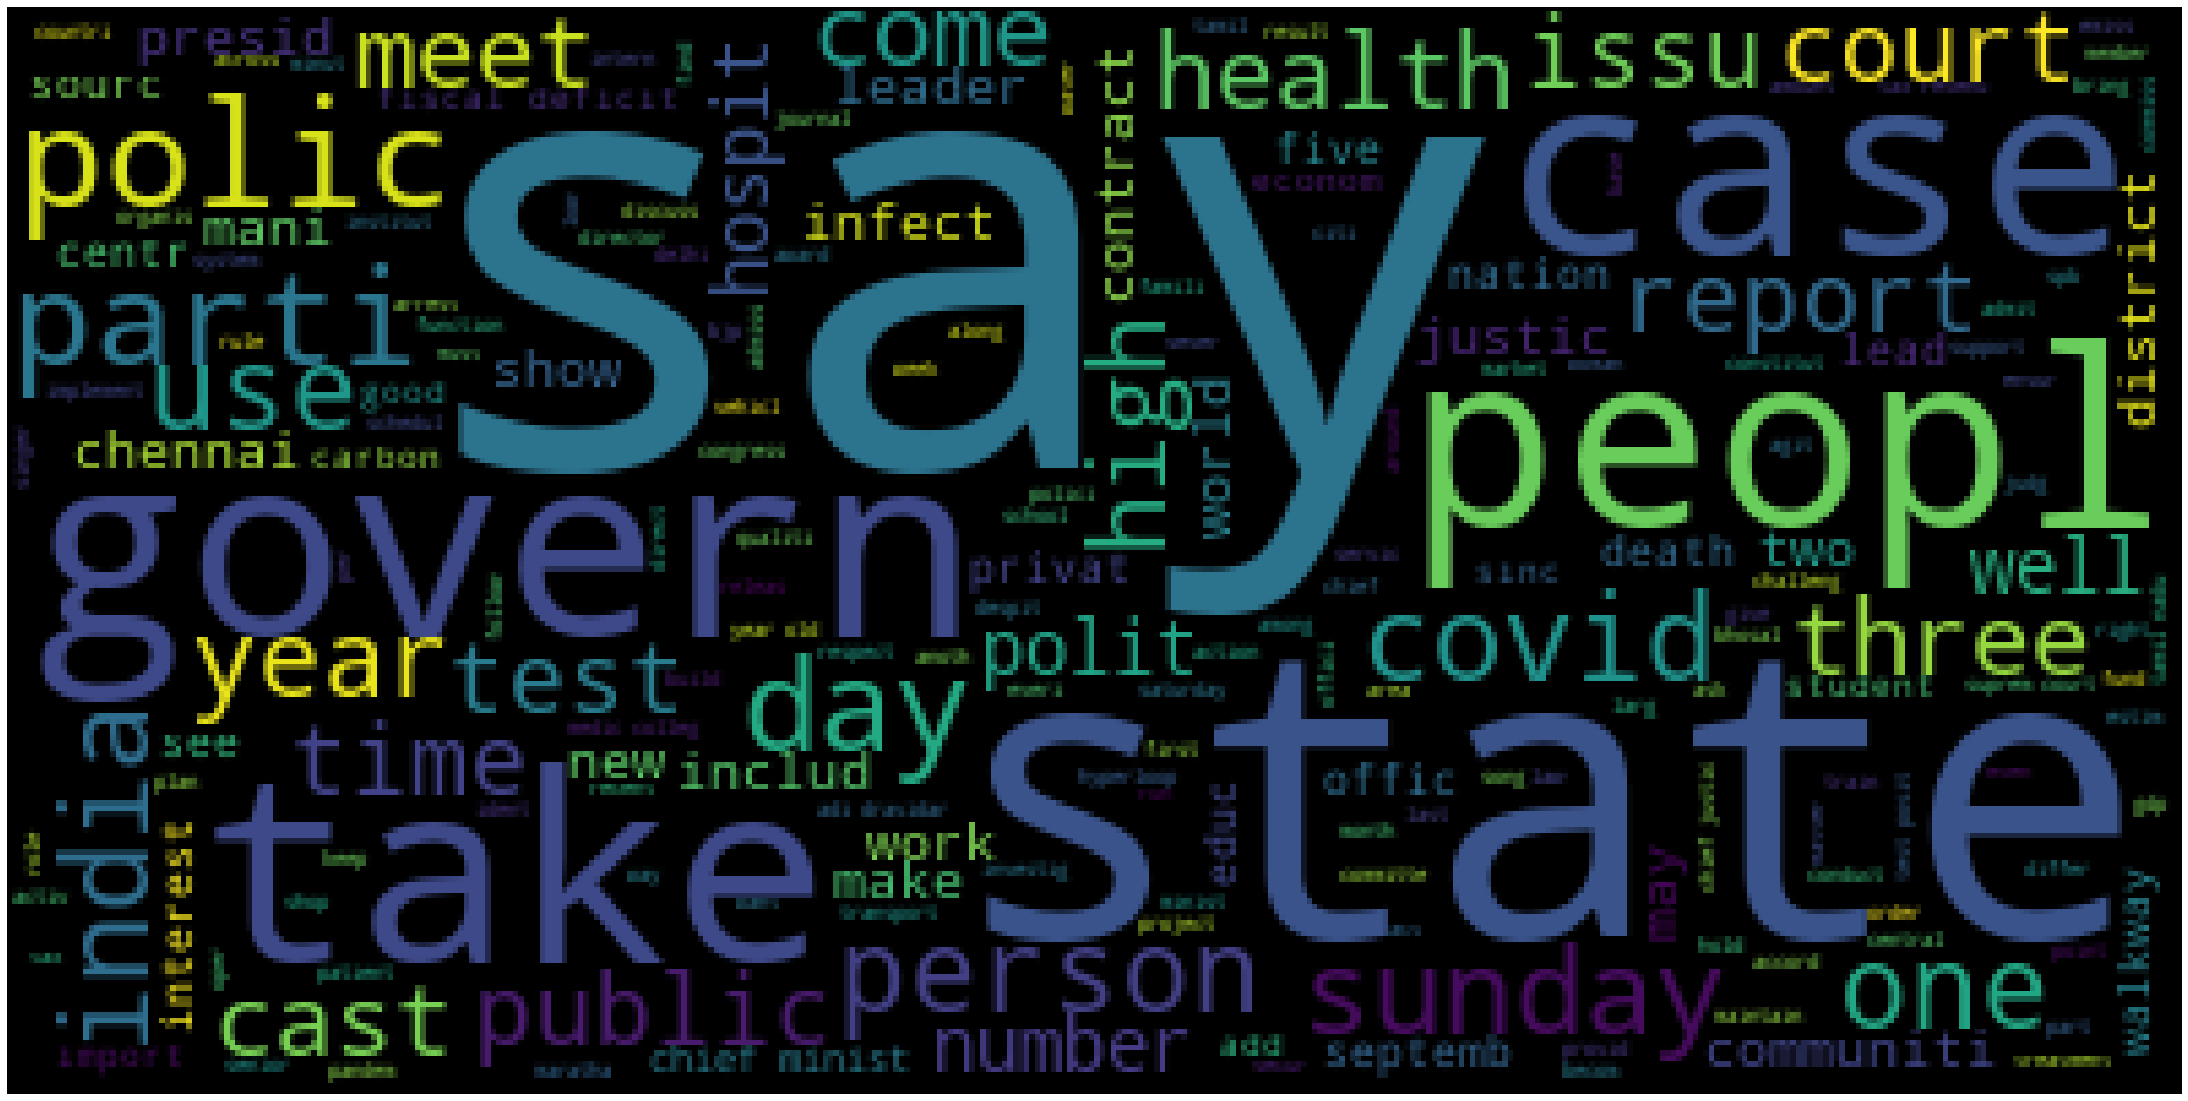

In [180]:
from wordcloud import WordCloud
wordcloud =  WordCloud(background_color="black").generate(' '.join(test["Article_Content_clean_test"]))
# Generate plot
plt.figure( figsize=(50,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [176]:
#Converting  dataframe to list
topics_docs_test = test['Article_Content_clean_test'].values.tolist()
# call above function sent_to_words
data_words_test = list(sent_to_words(topics_docs_test))
# Creating corpous
bow_corpus_test = [dictionary.doc2bow(doc) for doc in data_words_test]

In [178]:
for index, score in sorted(lda_model_tune[bow_corpus_test[40]]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tune.print_topic(index, 10)))

Score: 0.019105222076177597	 Topic: 0.008*"librari" + 0.006*"read" + 0.006*"student" + 0.005*"school" + 0.004*"book" + 0.004*"tea" + 0.003*"tribal" + 0.003*"india" + 0.003*"mission" + 0.003*"educ"
Score: 0.14159870147705078	 Topic: 0.004*"mask" + 0.003*"start" + 0.003*"first" + 0.003*"public" + 0.003*"hold" + 0.003*"two" + 0.003*"work" + 0.003*"around" + 0.003*"fine" + 0.003*"play"
Score: 0.19112326204776764	 Topic: 0.010*"minist" + 0.009*"singh" + 0.008*"bill" + 0.008*"bjp" + 0.007*"farmer" + 0.006*"parti" + 0.006*"leader" + 0.006*"congress" + 0.005*"chief" + 0.004*"india"
Score: 0.08638624846935272	 Topic: 0.004*"test" + 0.004*"polic" + 0.004*"centr" + 0.004*"land" + 0.003*"code" + 0.003*"minist" + 0.003*"get" + 0.003*"give" + 0.003*"sever" + 0.003*"work"
Score: 0.23686222732067108	 Topic: 0.011*"blood" + 0.008*"donat" + 0.004*"two" + 0.003*"time" + 0.003*"member" + 0.003*"group" + 0.003*"person" + 0.002*"level" + 0.002*"get" + 0.002*"oper"
Score: 0.23478668928146362	 Topic: 0.013*"p